In [7]:
import random
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as sps

# COIN-TOSS

A Mechanism is differentially private if for all $S \subseteq \operatorname{Range}(\mathcal{M})$ and for all $x, y \in \mathbb{N}|\mathcal{N}|$ such that $||x − y||1 \leq 1$: 

$$Pr[\mathcal{M}(x)\in S]\leq e^\epsilon Pr[\mathcal{M}(y)\in S]+\delta$$

where the probability space is over the coin flips of the mechanism 𝓜. If $\delta = 0$, we say that M is 𝜀-differentially private.


In [2]:
def trivialCointoss(data):
    size = len(data)
    outputs = []
    for i in range(size):
        if random.random()>0.5:
            outputs.append(data[i])
        else:
            outputs.append(1 if random.random() > 0.5 else 0)
        
    return outputs

In [3]:
def getOriginalProbabilities(data):
    Y = np.sum(data)/len(data)
    p = 2*Y - 1/2
    return p

In [4]:
datasize = 100000
p0 = 0.25
data = [1 if random.random() < p0 else 0 for i in range(datasize)]
tct = trivialCointoss(data)
print(f"original p:{p0} - observed {getOriginalProbabilities(tct):.2f}")

p1 = 0.5
data = [1 if random.random() < p1 else 0 for i in range(datasize)]
tct = trivialCointoss(data)
print(f"original p:{p1} - observed {getOriginalProbabilities(tct):.2f}")

p2 = 0.7
data = [1 if random.random() < p2 else 0 for i in range(datasize)]
tct = trivialCointoss(data)
print(f"original p:{p2} - observed {getOriginalProbabilities(tct):.2f}")

p3 = 0.8
data = [1 if random.random() < p3 else 0 for i in range(datasize)]
tct = trivialCointoss(data)
print(f"original p:{p3} - observed {getOriginalProbabilities(tct):.2f}")


original p:0.25 - observed 0.25
original p:0.5 - observed 0.50
original p:0.7 - observed 0.70
original p:0.8 - observed 0.80


In [5]:
def verifyCointoss(trueAnswers, cointoss):
    #probability of simulated yes where the true answer was yes
    prx = len(np.where((np.array(cointoss)==1) & (np.array(trueAnswers)==1))[0])/len(np.where(np.array(trueAnswers)==1)[0])
    # probaility of sumulated yes where thee true answer was no
    pry = len(np.where((np.array(cointoss)==1) & (np.array(trueAnswers)==0))[0])/len(np.where(np.array(trueAnswers)==0)[0])

    return prx/pry

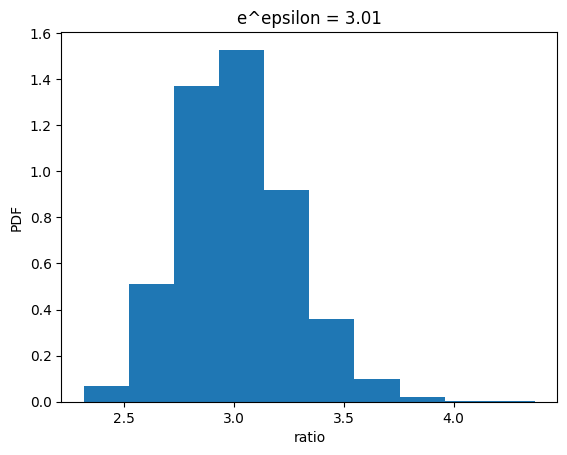

In [6]:
simsize = 10000
datasize= 1000
probabilities = []
for s in range(simsize):
    data = [1 if random.random() < 0.5 else 0 for i in range(datasize)]
    probabilities.append(verifyCointoss(data, trivialCointoss(data)))
                         
plt.hist(probabilities, density=True)
plt.ylabel("PDF")
plt.xlabel("ratio")
plt.title(f"e^epsilon = {np.mean(probabilities):.2f}")
plt.show()

In [16]:
def epsilonCointoss(data, epsilon=1e-5):
    
    #modify the trivial cointoss so that it implements DP
    #with the required privacy budget and verify that it satifies it
    
    
    return outputs

def getEpsilonOriginalProbabilities(data, epsilon=1e-5):

    return p

In [49]:
datasize = 100000
p0 = 0.25
epsilon = np.log(1.1)
print(f"epsilon: {epsilon}")
data = [1 if random.random() < p0 else 0 for i in range(datasize)]
tct = epsilonCointoss(data, epsilon)
print(f"original p:{p0} - observed {getEpsilonOriginalProbabilities(tct, epsilon):.2f}")

epsilon: 0.09531017980432493
original p:0.25 - observed 0.27


# LAPLACE MECHANISM

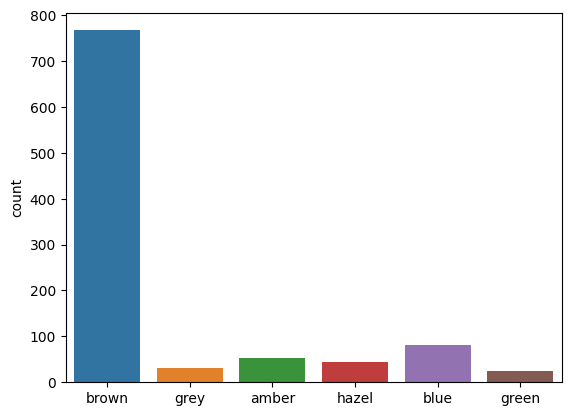

In [115]:
colors  = ["blue", "green", "amber", "brown", "hazel", "grey"]
frequencies = [0.08, 0.02, 0.05, 0.77, 0.05, 0.03]
eye_color = npr.choice(colors, size=1000, p=frequencies)
sns.countplot(x=eye_color)
plt.show()

In [116]:
def laplace_mechanism(original_values, epsilon=1e-5, sensitivity=1):
    outputs = original_values + npr.laplace(scale = sensitivity/epsilon, loc=0, size=len(original_values))
    return outputs

## COUNT QUERIES

In [117]:
blue_eyes = [len(np.where(eye_color=='blue')[0])]
epsilon = 1
print(f"original {blue_eyes} - observed {laplace_mechanism(blue_eyes, epsilon)}")

original [81] - observed [79.40918704]


In [118]:
blue_eyes = [len(np.where(eye_color=='blue')[0])]
sensitivity = 1 #what is the sensitivity of a count query
delta = 0.05
epsilon = 0.5
query_dimension = len(blue_eyes)
exp_samples = 100000

ratio = np.log(query_dimension/delta)*(sensitivity/epsilon)
errors = [np.abs((blue_eyes-laplace_mechanism(blue_eyes, epsilon)))>=ratio for i in range(exp_samples)]
print(f"probability of having an error bigger than {ratio:.3f}: {np.sum(errors)/len(errors):.3f} -- expected <= {delta}")

probability of having an error bigger than 5.991: 0.050 -- expected <= 0.05


## HISTOGRAM QUERIES

In [119]:
_, histogram = np.unique(eye_color, return_counts=True)
epsilon = 0.005
perturbedHistogram = laplace_mechanism(histogram, epsilon)

print(f"original {histogram} - observed {perturbedHistogram}")

original [ 52  81 767  24  32  44] - observed [  75.28263663 -121.35535108  881.08064923  256.54435484   44.75046793
 -187.26123309]


In [120]:
sensitivity = 1
query_dimension = len(histogram)
epsilon = 0.05
delta = 0.05
ratio = np.log(query_dimension/delta)*(sensitivity/epsilon)

errors = [np.max(np.abs(laplace_mechanism(histogram, epsilon)-histogram))>=ratio for i in range(exp_samples)]

print(f"probability of having an error bigger than {ratio:.3f}: {np.sum(errors)/len(errors):.3f} -- expected <= {delta}")

probability of having an error bigger than 95.750: 0.049 -- expected <= 0.05


## REPORT NOISY MAX

In [123]:
def report_noisy_max(dataset, epsilon=1):
    labels, counts = np.unique(dataset, return_counts=True)
    noisy_max = np.argmax(laplace_mechanism(counts, epsilon))
    return labels[noisy_max]

epsilon = 0.05
report_noisy_max(eye_color, epsilon)

'brown'

# EXPONENTIAL MECHANISM

In [177]:
#private bids
private_bids = [0.41, 0.1, 0.1, 0.1]

#possible prices
R_size = 101
R = [round(r, 2) for r in np.linspace(0,1, R_size)] #just to avoid numerical errors


In [178]:
def utility(R, bids):
    #define the utility values that can be observed, given the prices and the bids
    utilities = []

    #put here the computation of the utility
    for p in R:
        utilities.append(p*len([b for b in bids if b>=p]))
    return np.array(utilities)

In [179]:
perturbed_utils = []
true_utility = utility(R, private_bids)
for i in range(len(private_bids)):
    perturbed_utils.append(utility(R, private_bids[:i]+private_bids[i+1:]))
perturbed_utils.append(utility(R, [1]+private_bids))

sensitivity = np.max([np.max(np.abs(true_utility-pu)) for pu in perturbed_utils])


In [197]:
def exponential_mechanism(R, true_utility, sensitivity, epsilon=0.5):
    
    probabilities = np.exp(true_utility*(epsilon/(2*sensitivity)))
    probabilities /= np.sum(probabilities)
    output = npr.choice(R, p=probabilities)
    
    return output, probabilities


In [198]:
np.exp(true_utility*(epsilon/(2*sensitivity)))
p /= np.sum(probabilities)


array([1.        , 1.22140276, 1.4918247 , 1.8221188 , 2.22554093,
       2.71828183, 3.32011692, 4.05519997, 4.95303242, 6.04964746,
       7.3890561 , 1.73325302, 1.8221188 , 1.91554083, 2.01375271,
       2.11700002, 2.22554093, 2.33964685, 2.45960311, 2.58570966,
       2.71828183, 2.85765112, 3.00416602, 3.15819291, 3.32011692,
       3.49034296, 3.66929667, 3.85742553, 4.05519997, 4.26311452,
       4.48168907, 4.71147018, 4.95303242, 5.20697983, 5.47394739,
       5.75460268, 6.04964746, 6.35981952, 6.68589444, 7.02868758,
       7.3890561 , 7.76790111, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

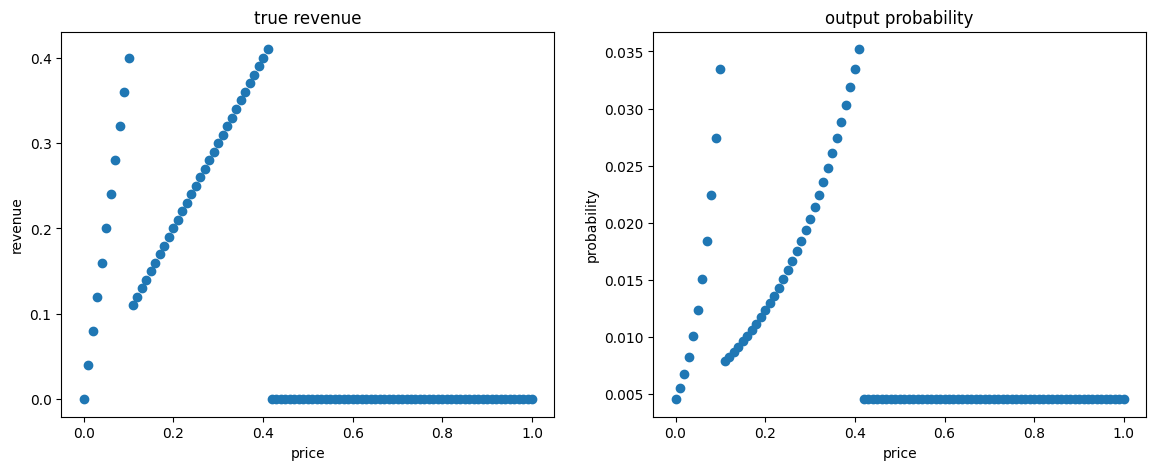

best price: 0.41 - optimal utility: 0.41
output value: 0.38 - revenue: 0.38


In [204]:
epsilon = 10


sampled_price, probabilities = exponential_mechanism(R, true_utility, sensitivity, epsilon)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))



ax1.set(title = "true revenue", xlabel = "price", ylabel = "revenue")
ax1.scatter(R, true_utility)


ax2.set(title = "output probability", xlabel = "price", ylabel = "probability")
ax2.scatter(R, probabilities)
plt.show()

revenue = utility([sampled_price], private_bids)[0]
optimal_revenue = true_utility[np.argmax(true_utility)]
print(f"best price: {R[np.argmax(true_utility)]} - optimal utility: {optimal_revenue:.2f}")
print(f"output value: {sampled_price:.2f} - revenue: {revenue:.2f}");

In [176]:
t = 3 #gives ~0.05 of probability
epsilon = 10
Ropt_size=1

max_error = (2*sensitivity/epsilon*(np.log(R_size/Ropt_size)+t))
acceptable_value = optimal_revenue - max_error
exp_samples = 1000
errors = []
for e in range(exp_samples):
    r, _ = exponential_mechanism(R, true_utility, sensitivity, epsilon)
    observed_utility = utility([r], private_bids)[0]
    errors.append(observed_utility<=acceptable_value)

print(f"probability of having an error bigger than {max_error:.2f} {np.sum(errors)/len(errors):.3f} <= {np.exp(-t):.2f}")

probability of having an error bigger than 1.52 0.000 <= 0.05


# SEQUENTIAL COMPOSITION

In [81]:
real_value = 3.1415
epsilon = 0.1
print(f"the protected value is {laplace_mechanism(real_value, epsilon)} ... probably not {real_value}")

the protected value is 7.939613875172345 ... probably not 3.1415


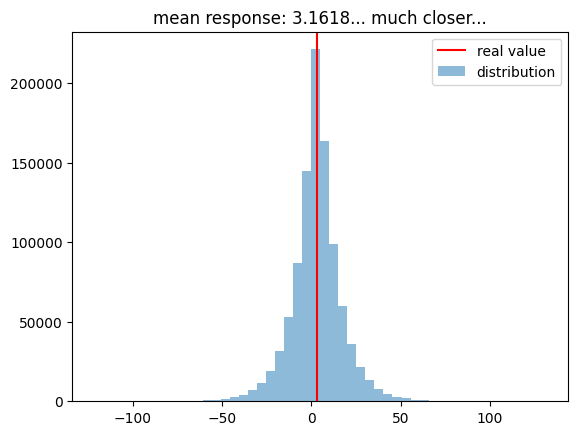

In [82]:
replicates = 1000000
plt.axvline(real_value, c='r')
responses = [laplace_mechanism(real_value, epsilon) for _ in range(replicates)]
plt.hist(responses, alpha =0.5, bins=50)
plt.legend(["real value", "distribution"])
plt.title(f"mean response: {np.mean(responses):.4f}... much closer...")
plt.show()

Assume you have a $\varepsilon_1$ differentially private Laplace mechanism and a second mechanism wich is $\varepsilon_2$ differentially private

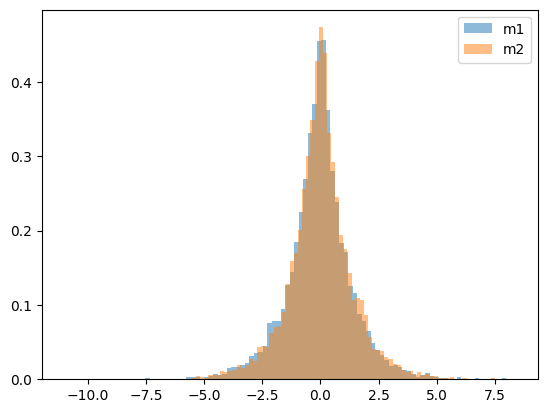

In [121]:
epsilon1 = 1
epsilon2 = 1
l1 = npr.laplace(scale = 1/epsilon1, loc=0, size=10000)
plt.hist(l1, bins=100, alpha=0.5, density=True)
l2 = npr.laplace(scale = 1/epsilon2, loc=0, size=10000)
plt.hist(l2, bins=100, alpha=0.5, density=True)
plt.legend(["m1", "m2"])
plt.show()

What happens if we combine the two mechanisms?

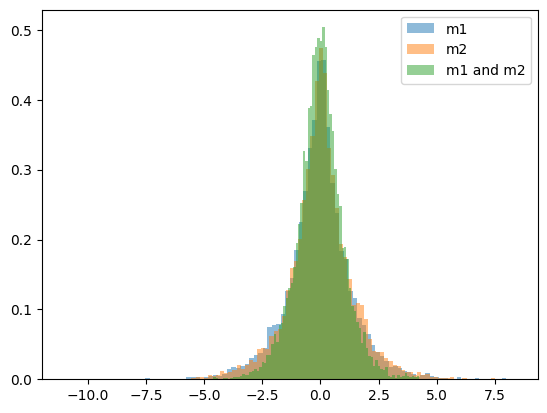

In [126]:
plt.hist(l1, bins=100,alpha=0.5, density=True)
plt.hist(l2, bins=100,alpha=0.5, density=True)
plt.hist((l1+l2)/2, bins=100,alpha=0.5, density=True)
plt.legend(["m1", "m2", "m1 and m2"])

plt.show()

If we combine the two (imagine it as repeating multiple time the same query, and averaging over all the results), we get a less private mechanism than before (pointier)!

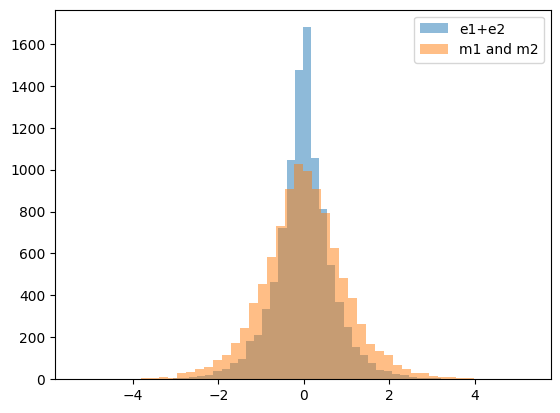

In [4]:
plt.hist(npr.laplace(scale = 1/(epsilon1+epsilon2), loc=0, size=10000), bins=50,alpha=0.5)
plt.hist((l1+l2)/2, bins=50,alpha=0.5)
plt.legend(["e1+e2", "m1 and m2"])
plt.show()

Lukily, it is not as bad as the sum, which is an upper bound.

# SPARSE VECTOR

In [163]:
def sparse_vectors(data, queries, threshold, epsilon=0.5):
    threshold_perturbed = npr.laplace(threshold, 2/epsilon) 
    
    for q in queries:
        qnoise = npr.laplace(0, 4/epsilon) 
        if (q(data) + qnoise) >= threshold_perturbed:
            yield "ABOVE"
            break
        else:
            yield "BELOW"

In [178]:
scores = npr.random(size=10)

queries = [lambda x: x[0], 
           lambda x: x[1],
           lambda x: x[2], 
           lambda x: x[3], 
           lambda x: x[4],
           lambda x: x[5], 
           lambda x: x[6],
           lambda x: x[7], 
           lambda x: x[8], 
           lambda x: x[9]]
output = list(sparse_vectors(scores, queries, .5, epsilon=10))
print(scores,output)

In [ ]:
def sparse(data, epsilon=1e-5):
    # homework EXAMPLE
    
    # implement the sparse algorithm (Dwork, Cynthia, and Aaron Roth. 
    #"The algorithmic foundations of differential privacy." Foundations and 
    #Trends® in Theoretical Computer Science 9.3–4 (2014): 211-407. Page 61)
    return outputs

In [ ]:
def numericSparse(data, epsilon=1e-5):
    # homework EXAMPLE

    # implement the numericSparse algorithm (Dwork, Cynthia, and Aaron Roth. 
    #"The algorithmic foundations of differential privacy." Foundations and 
    #Trends® in Theoretical Computer Science 9.3–4 (2014): 211-407. Page 61)
    return outputs

further exercises (and a lot of examples queries for your homeworks): https://programming-dp.com/cover.html

naive implementation of many of the algorithms in algorithms in "algoritmic foundations of dp": 
https://github.com/mbrg/differential-privacy

# THE MEAN QUERY

How to compute the differentially private mean? we don't know the sensitivity: the new subject in the neighbouring dataset might be very different - there is no "upper bound" to the possible change.

But, a mean is composed by two queries: one sum and one count (post-processed) and we know that DP enjoyes closure with respect to postprocessing.

Count query: easy - we know how to do it.

Sum query: still unbounded. nevertheless, we can replace the normal sum with the clipped sum: if the value is in a certain range, add it - else, clip it and add the clipped value.
What is the sensitivity of such operation? the dimension of the clipping interval. 


We still have to decide what clipping value to use. What if we use 1 as clippling value? and what if we use 2? The change is very big. Viceversa, if we use max(df) as clipping value this will be exactly equal to the sum, and so it will be if we use max(df)-1. 

So, to decide the clipping bound, we can apply above_threshold algorithm and check for what value of b we get that clipping(data, b) - clipping(data, b+1) is above 0. 


We are going to apply three algorithms:
<ol>
    <li> noisy count to discover the number of subjects </li>
    <li> above_threshold to decide the best clipping </li>
    <li> noisy sum to compute the clipped sum</li>
</ol>

Since all these queries are applied independently and in series, we have that the global epsilon is going to be the sum of all the epsilon: we can assign 1/3 of epsilon to each action.

In [100]:
def clip (v, l, u):
    if v>u:
        return u
    elif v<l:
        return l
    else:
        return v
    
def clipped_sum(data, l, u):
    return np.array([clip(v, l, u) for v in data]).sum()

# preserves epsilon-differential privacy
def above_threshold(queries, df, T, epsilon):
    T_hat = T + np.random.laplace(loc=0, scale = 2/epsilon)   
    for idx, q in enumerate(queries):
        nu_i = np.random.laplace(loc=0, scale = 4/epsilon)
        if q(df) + nu_i >= T_hat:
            return idx
    # if the algorithm "fails", return a random index 
    # more convenient in certain use cases    
    return random.randint(0,len(queries)-1)


def auto_avg(df, epsilon):
    def create_query(b):
        return lambda df: clipped_sum(df, 0, b) - clipped_sum(df, 0, b+1)

    # Construct the stream of queries
    bs = range(1,150000,5)
    queries = [create_query(b) for b in bs]
    
    # Run AboveThreshold, using 1/3 of the privacy budget, to find a good clipping parameter
    epsilon_svt = epsilon / 3
    final_b = bs[above_threshold(queries, df, 0, epsilon_svt)]
    
    
    # Compute the noisy sum and noisy count, using 1/3 of the privacy budget for each
    epsilon_sum = epsilon / 3
    epsilon_count = epsilon / 3
    
    
    noisy_sum = npr.laplace(loc=clipped_sum(df, 0, final_b), scale=final_b/epsilon_sum)
    noisy_count = npr.laplace(loc=len(df), scale=1/epsilon_count)
    
    return noisy_sum/noisy_count

data = np.abs(npr.random(size=100)*50)
print(f"real mean: {np.mean(data)} - dp mean: {auto_avg(data, 1)}")



real mean: 24.118308543001834 - dp mean: 22.73800023776875
